In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

In [2]:
# %% basic inputs
#total time? 100000
length = 10**5
#number of fluorescence events
num_peaks = 2000
#the mean standard deviation of the "time spent in focal spot"
width = 10

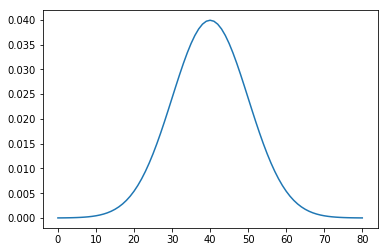

In [3]:
# %% define one peak
# a Gaussian with standard deviation "width"
p = np.exp(-np.linspace(-width*4,width*4,width*8+1)**2/2/width**2)
#normalize
p = p/np.sum(p)
plt.plot(p)
plt.show()

In [4]:
# %% define model intensity vs time
#total time - length of peak - 1, so the peaks don't run off the end of the array.
max_left_edge = length-p.shape[0]-1
#randomly distribute peaks across the entire time domain
left_edge = np.random.rand(num_peaks)*max_left_edge
#cast to integers
left_edge = left_edge.astype(np.uint32)

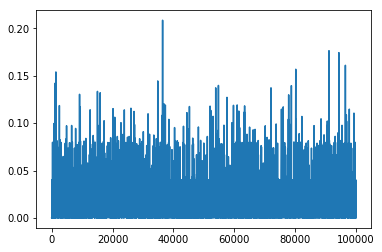

In [5]:
#initialize array
intensity = np.zeros(length)
#for each peak, add p (peak) to only that section of the array 
#this is cool, then you don't have to pad everything with zeros
for i in range(num_peaks):
    intensity[left_edge[i]:(left_edge[i]+p.shape[0])] = intensity[left_edge[i]:(left_edge[i]+p.shape[0])] + p

plt.plot(intensity)
plt.show()

In [6]:
# %% do autocorrelation
#evenly spaced points (for tau?) on a log scale. 
dt = np.logspace(0,np.log10(width*30),100)
dt = dt.astype(np.uint32)
#I looked up what "unique" does, but I don't think I understand why it is necessary, 
# unless some of the small values end up the same when you cast to int? I printed it
# and that's exactly what it does...
dt = np.unique(dt)  
#I'm glad I'm not the only one who initializes arrays this way... I know there's 
# some way to append shit, but I'm way too lazy to figure that out
G = np.zeros(dt.shape[0])

#this is the actual autocorrelation
for i in range(dt.shape[0]):
    G[i] = np.mean(intensity[:(intensity.shape[0]-dt[i])]*intensity[dt[i]:])

G = G/np.mean(intensity)**2-1

In [7]:
# %% find half tau
g0 = G[0]
half_g0 = np.min(np.abs(G-g0/2))
i = np.linspace(0,G.shape[0]-1,G.shape[0])
half_g0i = i[np.abs(G-g0/2)==half_g0]
tau_half = dt[half_g0i.astype(np.uint32)]
tau_half = tau_half[0]
#print(tau_half)

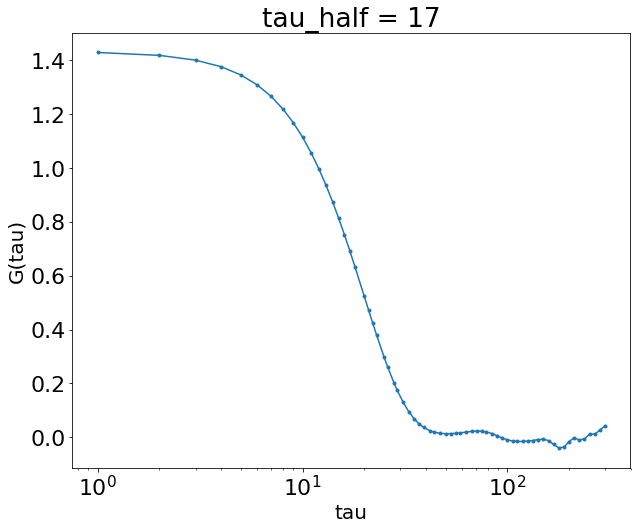

In [8]:
# %% make plot
fig = plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 22})
plt.semilogx(dt,G,'.-')
plt.xlabel('tau',fontsize=20)
plt.ylabel('G(tau)',fontsize=20)
plt.title('tau_half = '+str(tau_half))
plt.show()